In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics, cross_validation
from sklearn.linear_model import LogisticRegression as logreg
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [6]:
def recategorize(data,columnname):
    
    counts = data[columnname].value_counts()
    nameSet = set(counts[counts>= 0.01*len(data.index)].index.values)
    
    data.loc[:,columnname] = data[columnname].apply(lambda x:'OTHER'if x not in nameSet else x)
    return data

In [14]:

data = pd.read_csv("training.csv")

print(len(data.index)) # number of data (cars)

data.info()
#如果有一個missing 則去掉此物件
data2 = data.dropna(axis =0, how = 'any', subset = ['Color',
                                                    'Transmission',
                                                    'Nationality',
                                                    'Size',
                                                    'TopThreeAmericanName',
                                                    'MMRAcquisitionAuctionAveragePrice',
                                                    'MMRAcquisitionAuctionCleanPrice',
                                                    'MMRAcquisitionRetailAveragePrice',
                                                    'MMRAcquisitonRetailCleanPrice',
                                                    'MMRCurrentAuctionAveragePrice',
                                                    'MMRCurrentAuctionCleanPrice',
                                                    'MMRCurrentRetailAveragePrice',
                                                    'MMRCurrentRetailCleanPrice'])
data.head()

72983
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nati

,RefId,IsBadBuy,PurchDate,Auction,VehYear,VehicleAge,Make,Model,Trim,SubModel,...,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,PRIMEUNIT,AUCGUART,BYRNO,VNZIP1,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,12/7/2009,ADESA,2006,3,MAZDA,MAZDA3,i,4D SEDAN I,...,11597.0,12409.0,NaN,NaN,21973,33619,FL,7100.0,0,1113
1,2,0,12/7/2009,ADESA,2004,5,DODGE,1500 RAM PICKUP 2WD,ST,QUAD CAB 4.7L SLT,...,11374.0,12791.0,NaN,NaN,19638,33619,FL,7600.0,0,1053
2,3,0,12/7/2009,ADESA,2005,4,DODGE,STRATUS V6,SXT,4D SEDAN SXT FFV,...,7146.0,8702.0,NaN,NaN,19638,33619,FL,4900.0,0,1389
3,4,0,12/7/2009,ADESA,2004,5,DODGE,NEON,SXT,4D SEDAN,...,4375.0,5518.0,NaN,NaN,19638,33619,FL,4100.0,0,630
4,5,0,12/7/2009,ADESA,2005,4,FORD,FOCUS,ZX3,2D COUPE ZX3,...,6739.0,7911.0,NaN,NaN,19638,33619,FL,4000.0,0,1020


In [46]:
for i in range(len(data2.columns)):
    data2 = recategorize(data2, str(data2.columns[i]))

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
data2['Make'].unique()

array(['MAZDA', 'DODGE', 'FORD', 'MITSUBISHI', 'KIA', 'OTHER', 'NISSAN',
       'CHEVROLET', 'SATURN', 'CHRYSLER', 'MERCURY', 'HYUNDAI', 'TOYOTA',
       'PONTIAC', 'SUZUKI', 'JEEP'], dtype=object)

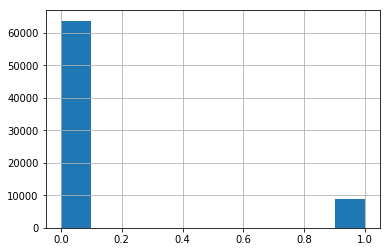

In [18]:
data2.IsBadBuy.hist()
plt.show()
#data2.Make.hist()
#data2.Make.value_counts().plot(kind='bar')
#plt.show()


C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


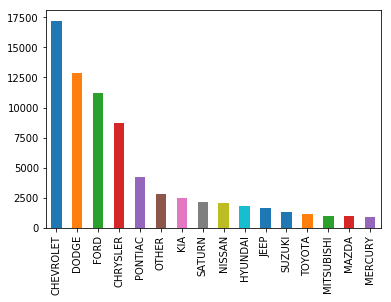

In [19]:
data2 = recategorize(data2, 'Make')
data2.Make.value_counts().plot(kind='bar')

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


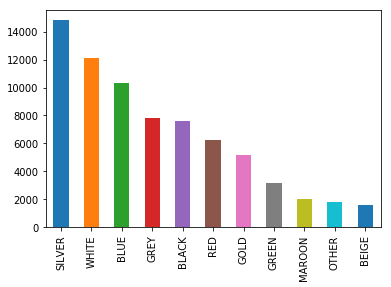

In [28]:
data2 = recategorize(data2, 'Color')
data2.Color.value_counts().plot(kind='bar')

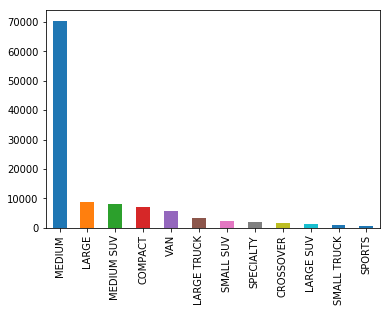

In [21]:
data.Transmission.value_counts().plot(kind='bar')
data.Nationality.value_counts().plot(kind='bar')
data.Size.value_counts().plot(kind='bar')

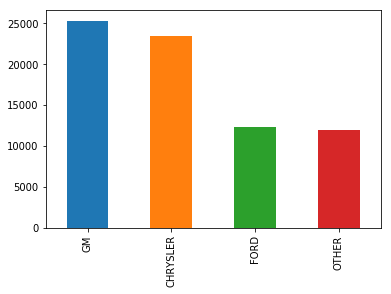

In [22]:
data.TopThreeAmericanName.value_counts().plot(kind='bar')

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


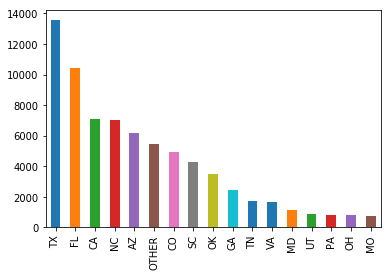

In [23]:
data2 = recategorize(data2, 'VNST')
data2.VNST.value_counts().plot(kind='bar')

In [24]:
data2.info()
data2_cleaned = data2.drop(["RefId","PurchDate","VehYear","WheelTypeID","BYRNO","VNZIP1","PRIMEUNIT","AUCGUART","Trim"],axis=1)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72658 non-null int64
IsBadBuy                             72658 non-null int64
PurchDate                            72658 non-null object
Auction                              72658 non-null object
VehYear                              72658 non-null int64
VehicleAge                           72658 non-null int64
Make                                 72658 non-null object
Model                                72658 non-null object
Trim                                 70301 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelTypeID                          69499 non-null float64
WheelType                            69494 non-null object
VehOdo                               72658 non-null int64
Nationalit

In [25]:
data2_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72658 entries, 0 to 72982
Data columns (total 25 columns):
IsBadBuy                             72658 non-null int64
Auction                              72658 non-null object
VehicleAge                           72658 non-null int64
Make                                 72658 non-null object
Model                                72658 non-null object
SubModel                             72658 non-null object
Color                                72658 non-null object
Transmission                         72658 non-null object
WheelType                            69494 non-null object
VehOdo                               72658 non-null int64
Nationality                          72658 non-null object
Size                                 72658 non-null object
TopThreeAmericanName                 72658 non-null object
MMRAcquisitionAuctionAveragePrice    72658 non-null float64
MMRAcquisitionAuctionCleanPrice      72658 non-null float64
MMRAcqu

In [29]:
dataFinal = pd.get_dummies(data2_cleaned)
len(list(dataFinal))
dataFinal.head()
Y = dataFinal.loc[:,"IsBadBuy"]
X = dataFinal.drop("IsBadBuy",1)
X.head()
from sklearn.preprocessing import StandardScaler as SC
sc = SC()
Xnew = sc.fit_transform(X)

from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xnew, Y)

In [33]:
data2_cleaned.head()

,IsBadBuy,Auction,VehicleAge,Make,Model,SubModel,Color,Transmission,WheelType,VehOdo,...,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,VNST,VehBCost,IsOnlineSale,WarrantyCost
0,0,ADESA,3,MAZDA,MAZDA3,4D SEDAN I,RED,AUTO,Alloy,89046,...,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,FL,7100.0,0,1113
1,0,ADESA,5,DODGE,1500 RAM PICKUP 2WD,QUAD CAB 4.7L SLT,WHITE,AUTO,Alloy,93593,...,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,FL,7600.0,0,1053
2,0,ADESA,4,DODGE,STRATUS V6,4D SEDAN SXT FFV,MAROON,AUTO,Covers,73807,...,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,FL,4900.0,0,1389
3,0,ADESA,5,DODGE,NEON,4D SEDAN,SILVER,AUTO,Alloy,65617,...,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,FL,4100.0,0,630
4,0,ADESA,4,FORD,FOCUS,2D COUPE ZX3,SILVER,MANUAL,Covers,69367,...,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,FL,4000.0,0,1020


In [48]:
for i in range(len(dataFinal.columns)):
    print(dataFinal.columns[i])

IsBadBuy
VehicleAge
VehOdo
MMRAcquisitionAuctionAveragePrice
MMRAcquisitionAuctionCleanPrice
MMRAcquisitionRetailAveragePrice
MMRAcquisitonRetailCleanPrice
MMRCurrentAuctionAveragePrice
MMRCurrentAuctionCleanPrice
MMRCurrentRetailAveragePrice
MMRCurrentRetailCleanPrice
VehBCost
IsOnlineSale
WarrantyCost
Auction_ADESA
Auction_MANHEIM
Auction_OTHER
Make_CHEVROLET
Make_CHRYSLER
Make_DODGE
Make_FORD
Make_HYUNDAI
Make_JEEP
Make_KIA
Make_MAZDA
Make_MERCURY
Make_MITSUBISHI
Make_NISSAN
Make_OTHER
Make_PONTIAC
Make_SATURN
Make_SUZUKI
Make_TOYOTA
Model_1500 RAM PICKUP 2WD
Model_1500 RAM PICKUP 4WD
Model_1500 SIERRA PICKUP 2
Model_1500 SIERRA PICKUP 4
Model_1500 SILVERADO PICKU
Model_1500HD SIERRA PICKUP
Model_1500HD SILVERADO PIC
Model_2500 RAM PICKUP 2WD
Model_2500 RAM PICKUP 4WD
Model_2500 SILVERADO PICKU
Model_2500HD SIERRA PICKUP
Model_2500HD SILVERADO PIC
Model_3.2 CL
Model_3.2 CL 3.2L V 6 NA S
Model_3.2 TL
Model_3.2 TL 3.2L V6 EFI
Model_3.2 TL 3.2L V6 FI DO
Model_300
Model_300 2.7L V6 MPI


In [42]:
dataFinal[dataFinal['Model_COROLLA Multiple Eng']==1]

,IsBadBuy,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,...,VNST_NC,VNST_OH,VNST_OK,VNST_OTHER,VNST_PA,VNST_SC,VNST_TN,VNST_TX,VNST_UT,VNST_VA
17793,0,6,84792,4874.0,5820.0,5764.0,6786.0,5210.0,5953.0,9556.0,...,0,0,0,0,0,0,0,0,1,0
37936,0,6,77536,4971.0,5898.0,5869.0,6870.0,4971.0,5898.0,5869.0,...,0,0,0,1,0,0,0,0,0,0
43093,0,6,81559,4891.0,5872.0,5782.0,6842.0,5210.0,5953.0,9556.0,...,0,0,0,0,0,0,0,0,0,0
66077,0,6,95074,4971.0,5898.0,5869.0,6870.0,5354.0,6324.0,6282.0,...,1,0,0,0,0,0,0,0,0,0


In [10]:
lr = LR(C=1.) # create a model, set the parameters (hyperparameter)
lr.fit(X_train, Y_train) # train the model


lr.score(X_test, Y_test) # prediction performance, accuracy
from sklearn.metrics import precision_score,recall_score


precision = precision_score(Y_test, lr.predict(X_test),pos_label=1)
recall = recall_score(Y_test, lr.predict(X_test),pos_label=1)
print(precision)
print(recall)
lr.classes_


0.6404230317273796
0.23716275021758051


array([0, 1], dtype=int64)

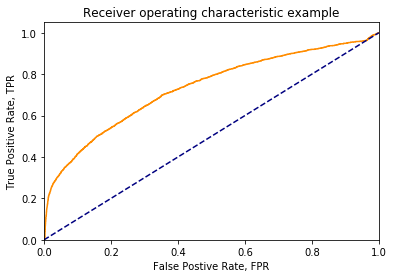

In [11]:

# TPR = TP/P
# FPR = FP/N
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, lr.predict_proba(X_test)[:,1],pos_label=1)

import matplotlib.pyplot as plt
plt.figure()
plt.plot(fpr, tpr, color='darkorange')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Postive Rate, FPR')
plt.ylabel('True Positive Rate, TPR')
plt.title('Receiver operating characteristic example')
plt.show()